In [1]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [2]:
Im_Width = 128
Im_Height = 128

nEpochs = 10

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (Im_Height,Im_Width)
VALIDATION_SPLIT = 0.2

In [4]:
train_data_dir = "Samples/0/train"
test_data_dir = "Samples/0/test"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=VALIDATION_SPLIT,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=VALIDATION_SPLIT,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 1500 files belonging to 3 classes.
Using 900 files for training.
Found 1500 files belonging to 3 classes.
Using 600 files for validation.
Found 750 files belonging to 3 classes.


In [5]:
class_names = train_data.class_names
class_names

['defective', 'no-bottle', 'non-defective']

In [6]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


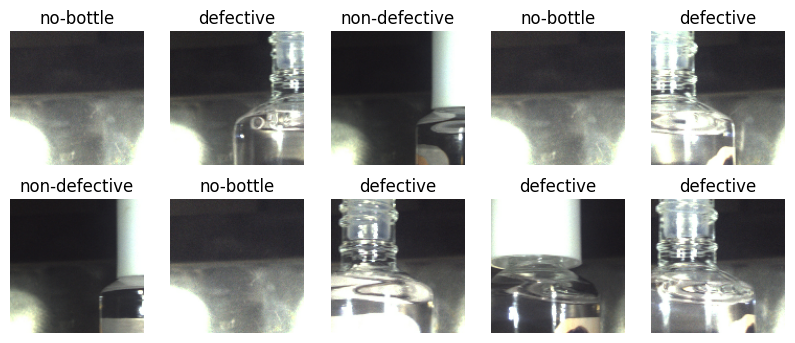

In [7]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [8]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [9]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(Im_Height,Im_Width,3),
                                                           weights="imagenet",
                                                           pooling='max')
for layer in pretrained_model.layers:
        layer.trainable=False

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(Im_Height, Im_Width, 3)))

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,894,699 (79.71 MB)

 Trainable params: 33,219 (129.76 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=nEpochs,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 751ms/step - accuracy: 0.5350 - loss: 0.7515 - val_accuracy: 0.9333 - val_loss: 0.3804
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 698ms/step - accuracy: 0.9734 - loss: 0.2611 - val_accuracy: 0.9567 - val_loss: 0.1494
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 696ms/step - accuracy: 0.9792 - loss: 0.0981 - val_accuracy: 0.9600 - val_loss: 0.0989
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 686ms/step - accuracy: 0.9828 - loss: 0.0601 - val_accuracy: 0.9633 - val_loss: 0.0824
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 681ms/step - accuracy: 0.9885 - loss: 0.0421 - val_accuracy: 0.9633 - val_loss: 0.0946
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 666ms/step - accuracy: 0.9865 - loss: 0.0459 - val_accuracy: 0.9683 - val_loss: 0.0865
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 671ms/step - accuracy: 0.9853 - loss: 0.0419 - val_accuracy: 0.9783 - val_loss: 0.0637
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 668ms/step - accuracy: 0.9945 - loss: 0.0239 - val_accu

In [14]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')


Total time for training 201.440 seconds


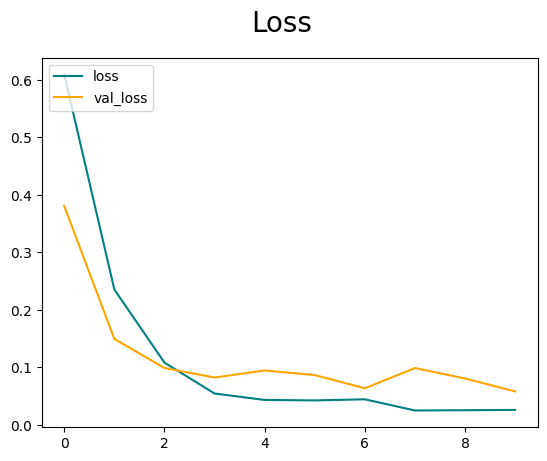

In [15]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

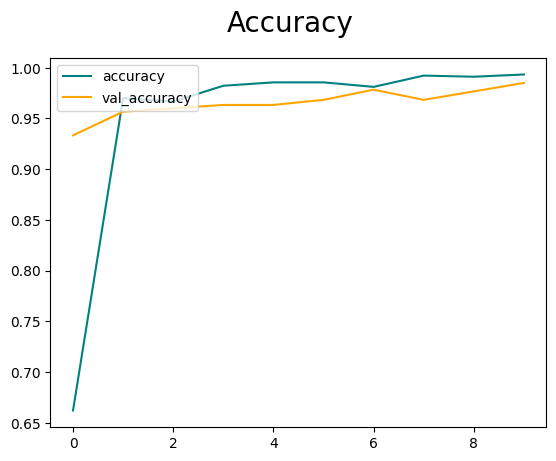

In [16]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [18]:
precision.result()
recall.result()
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [19]:
model.save('my_model_23.0.keras') # saves the model in keras format
